In [1]:
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import scipy

np.random.seed(123)
'''
4.3 - For the temperature data of the previous example, consider a polynomial fit
of the form:

f(x) = sum_{k=0}^10  alpha_k x^k

where the loadings alpha_k are to be determined by four regression techniques:
least-squares, LASSO, ridge, and elastic net. Compare the models for each, against
each other.


Randomly pick any time point and corrupt the temperature measurement at that location.
For instance, the temperature reading at that location could be zero.
Investigate the resulting model and the E_2 error for the four regression techniques considered.
Identify the models that are robust to such an outlier and those that are not.
Explicitly calculate the variance of the loading coefficients alpha_k for each method
for a number of random trials with one or more corrupt data points.
'''

'\n4.3 - For the temperature data of the previous example, consider a polynomial fit\nof the form:\n\nf(x) = sum_{k=0}^10  alpha_k x^k\n\nwhere the loadings alpha_k are to be determined by four regression techniques:\nleast-squares, LASSO, ridge, and elastic net. Compare the models for each, against\neach other.\n\n\nRandomly pick any time point and corrupt the temperature measurement at that location.\nFor instance, the temperature reading at that location could be zero.\nInvestigate the resulting model and the E_2 error for the four regression techniques considered.\nIdentify the models that are robust to such an outlier and those that are not.\nExplicitly calculate the variance of the loading coefficients alpha_k for each method\nfor a number of random trials with one or more corrupt data points.\n'

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]
relative errors... (LSS, LASSO, Ridge, ElasticNet)
0.00873972759363089
1.2458826347960497
1.2323852305198921
1.2551906108391835


/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+01, tolerance: 2.145e-01
  coef_, l1_r

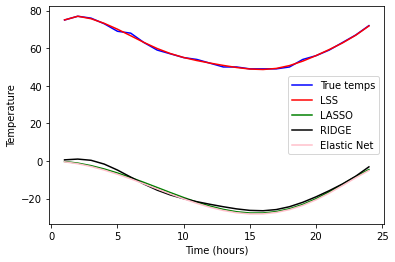

In [2]:
n = 24.0
p = 10

temperatures = np.array([75.0, 77.0, 76.0, 73.0, 69.0, 68.0, 63.0, 59.0,
57.0, 55.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0,
49.0, 50.0, 54.0, 56.0, 59.0, 63.0, 67.0, 72.0 ])
ts = np.arange(0,n)+1

#fapprox = scipy.interpolate.interp1d(ts, temperatures)
#hours = np.arange(0.0,n,0.01)
hours = np.copy(ts)
#print(hours[0])
#nn=len(hours)
print(hours)

f = np.copy(temperatures).T #fapprox(hours)#np.copy(temperatures).T
#print(temp.shape, hours.shape)
#print(hours)

X = []
for i in range(p+1):
    X.append(hours**i)
X = np.array(X).T

#print(X.shape)
#print(X[:,0:3])

#Obtain least squares solution
alpha_L2 = np.linalg.pinv(X) @ f
f_L2 = X @ alpha_L2

#Obtain LASSO solution
lasso_mod = linear_model.Lasso(alpha=1.0)# ,fit_intercept=True, normalize='deprecated')
lasso_mod.fit(X,f)
alpha_lasso = lasso_mod.coef_
f_lasso = X @ alpha_lasso

#compute ridge regression solution
ridge_mod = linear_model.Ridge(alpha=1.0)#,normalize=True)
ridge_mod.fit(X,f)
alpha_ridge = ridge_mod.coef_
f_ridge = X @ alpha_ridge

#compute ElasticNet solution
enet_mod = linear_model.ElasticNet(alpha=1.0,random_state=0)#l1_ratio=0.5, fit_intercept=True, normalize='deprecated')
enet_mod.fit(X,f)
alpha_eNet= enet_mod.coef_
f_eNet = X @ alpha_eNet


e0 = np.linalg.norm(f-f_L2,ord=2)/np.linalg.norm(f,ord=2)
e1 = np.linalg.norm(f-f_lasso,ord=2)/np.linalg.norm(f,ord=2)
e2 = np.linalg.norm(f-f_ridge,ord=2)/np.linalg.norm(f,ord=2)
e3 = np.linalg.norm(f-f_eNet,ord=2)/np.linalg.norm(f,ord=2)

print('relative errors... (LSS, LASSO, Ridge, ElasticNet)')
print(e0)
print(e1)
print(e2)
print(e3)


fig = plt.figure()
plt.plot(hours, f, color='b',label='True temps')
plt.plot(hours, f_L2, color='r',label='LSS')
plt.plot(hours, f_lasso, color='g',label='LASSO')
plt.plot(hours, f_ridge, color='k',label='RIDGE')
plt.plot(hours, f_eNet, color='pink',label='Elastic Net')
plt.ylabel('Temperature')
plt.xlabel('Time (hours)')
plt.legend()
plt.show()


In [3]:
def run_regression(mod, X, f, alpha, args=None):
    model = mod(alpha,max_iter=4000,random_state = 0 )#,fit_intercept=True, normalize='deprecated')
    model.fit(X,f)
    alpha_mod = model.coef_
    f_alph = X @ alpha_mod

    return f_alph, alpha_mod

def run_regressions(alphas, model, X, f, args=None):
    k = len(alphas)
    rel_err = np.zeros((k,))

    i = 0
    f_ls = []
    alph_ls = []
    for alph in alphas:
        f_mod, alpha_mod = run_regression(model, X, f, alph)
        rel_err[i] = np.linalg.norm(f-f_lasso,ord=2)/np.linalg.norm(f,ord=2)
        f_ls.append(f_mod)
        alph_ls.append(alpha_mod)
        i+=1

    return rel_err, f_ls, alph_ls

def plot_models(f_Ls, alphas, f_true, ts, title):

    colors = ['blue', 'red', 'green', 'k', 'pink', 'orange', 'purple']
    fig = plt.figure()
    plt.plot(ts, f_true, color='b',label='True temps')


    for i in range(len(alphas)):
        f_est = f_Ls[i]
        plt.plot(ts, f_est, color=colors[i],label=str(alphas[i]))

    plt.ylabel('Temperature')
    plt.xlabel('Time (hours)')
    plt.title(title)
    plt.legend()
    plt.show()

/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.903e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+02, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the num

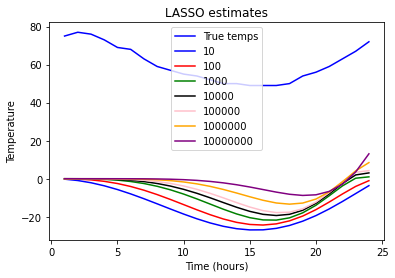

/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.35974e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.31202e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrit

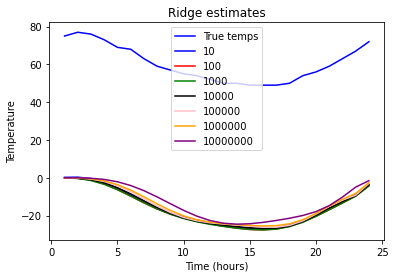

/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.737e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.849e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the num

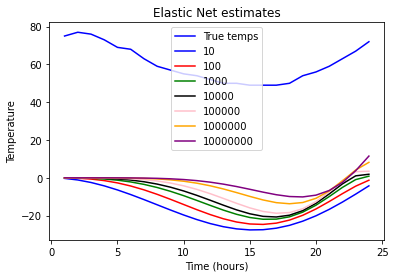

In [5]:
alphas = []
for i in range(7):
    alphas.append(10**(i+1))

#alphas = [0.0001, 0.001,0.01,0.1,1.0,10.0, 1000000.0]

lasso_errs, f_lassoLs, alpha_lassoLs = run_regressions(alphas, linear_model.Lasso, X, f)
plot_models(f_lassoLs, alphas, f, hours, 'LASSO estimates')

ridge_errs, f_ridgeLs, alpha_ridgeLs = run_regressions(alphas, linear_model.Ridge, X, f)
plot_models(f_ridgeLs, alphas, f, hours, 'Ridge estimates')


eNet_errs, f_eNetLs, alpha_eNetLs = run_regressions(alphas, linear_model.ElasticNet, X, f)
plot_models(f_eNetLs, alphas, f, hours, 'Elastic Net estimates')

In [12]:
def test_corruptions(r):
    for cc in range(1,r+1):
        print('testing ', cc+1,' corruptions')
        c_indx = np.random.permutation(nn)[:cc]
        f_corrupt = np.copy(f)
        f_corrupt[c_indx]=0.0

        #Obtain least squares solution
        alpha_L2 = np.linalg.pinv(X) @ f_corrupt
        f_L2 = X @ alpha_L2

        #Obtain LASSO solution
        lasso_mod = linear_model.Lasso(alpha=1.0)# ,fit_intercept=True, normalize='deprecated')
        lasso_mod.fit(X,f_corrupt)
        alpha_lasso = lasso_mod.coef_
        f_lasso = X @ alpha_lasso

        #compute ridge regression solution
        ridge_mod = linear_model.Ridge(alpha=1.0)#,normalize=True)
        ridge_mod.fit(X,f_corrupt)
        alpha_ridge = ridge_mod.coef_
        f_ridge = X @ alpha_ridge

        #compute ElasticNet solution
        enet_mod = linear_model.ElasticNet(alpha=1.0,random_state=0)#l1_ratio=0.5, fit_intercept=True, normalize='deprecated')
        enet_mod.fit(X,f_corrupt)
        alpha_eNet= enet_mod.coef_
        f_eNet = X @ alpha_eNet


        e0 = np.linalg.norm(f-f_L2,ord=2)/np.linalg.norm(f,ord=2)
        e1 = np.linalg.norm(f-f_lasso,ord=2)/np.linalg.norm(f,ord=2)
        e2 = np.linalg.norm(f-f_ridge,ord=2)/np.linalg.norm(f,ord=2)
        e3 = np.linalg.norm(f-f_eNet,ord=2)/np.linalg.norm(f,ord=2)

        print('relative errors... (LSS, LASSO, Ridge, ElasticNet)')
        print(e0)
        print(e1)
        print(e2)
        print(e3)


        fig = plt.figure()
        plt.plot(hours, f, color='b',label='True temps')
        plt.scatter(hours, f_corrupt, color='black',label='Corrupt data', marker = 'x')
        plt.plot(hours, f_L2, color='r',label='LSS')
        plt.plot(hours, f_lasso, color='g',label='LASSO')
        plt.plot(hours, f_ridge, color='k',label='RIDGE')
        plt.plot(hours, f_eNet, color='pink',label='Elastic Net')
        plt.ylabel('Temperature')
        plt.xlabel('Time (hours)')
        plt.title('Testing '+str(cc)+' corruptions')
        plt.legend()
        plt.show()
    return

testing  2  corruptions
relative errors... (LSS, LASSO, Ridge, ElasticNet)
0.08883062769177244
1.32263842695878
1.2522984300873927
1.3245548532685472


/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+03, tolerance: 5.565e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+03, tolerance: 5.565e-01
  coef_, l1_r

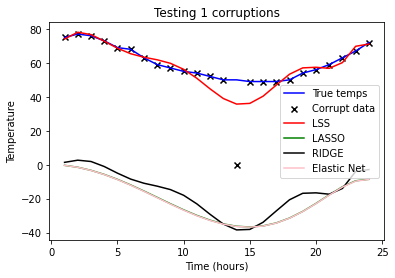

testing  3  corruptions
relative errors... (LSS, LASSO, Ridge, ElasticNet)
0.19339859729843
1.094332065179916
1.4389570890251646
1.0920627251990764


/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.332e+03, tolerance: 8.379e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.328e+03, tolerance: 8.379e-01
  coef_, l1_r

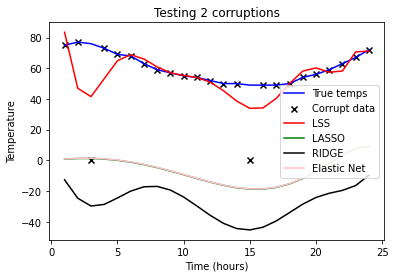

testing  4  corruptions
relative errors... (LSS, LASSO, Ridge, ElasticNet)
0.29147624754413776
0.4217015349191474
0.4013161061041327
0.6440445577040327


/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.900e+03, tolerance: 1.078e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.175e+03, tolerance: 1.078e+00
  coef_, l1_r

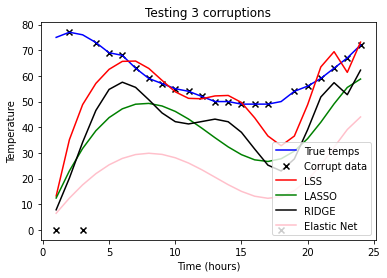

testing  5  corruptions
relative errors... (LSS, LASSO, Ridge, ElasticNet)
0.3354852151892125
0.8996234104105103
0.33982248970120077
0.9572881424604058


/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.784e+03, tolerance: 1.366e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/german/opt/anaconda3/envs/snake/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.823e+03, tolerance: 1.366e+00
  coef_, l1_r

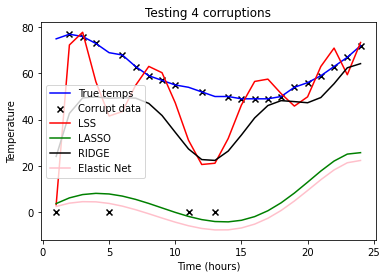

In [13]:
nn = len(hours)
#cc = 1
#zc_indx = np.random.permutation(nn)[:cc]
#f_corrupt = np.copy(f)
#f_corrupt[c_indx]=0.0

test_corruptions(4)